# Exercício 1

In [22]:
# Import all the necessary libraries.
import numpy as np
import timeit
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import LeavePOut


%matplotlib notebook

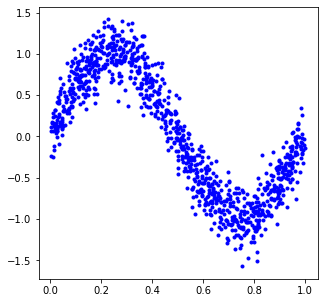

In [23]:
df = pd.read_csv('./poly_reg_p.csv', header=None)
x = df[0].to_numpy()
y = df[1].to_numpy()
x = x.reshape(len(x), 1)
y = y.reshape(len(y), 1)
fig = plt.figure(figsize=(5,5))
plt.plot(x, y, 'b.')


# Holdout Cross-Validation (70-30%)

In [24]:
# Get timestamp of holdout start.
starttime = timeit.default_timer()

# Split the whole set into random training and validation set.
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.3, random_state=10)

print('tamanho conjunto de treinamento:', len(y_train))
print('tamanho conjunto de validação:', len(y_val))


include_bias=True
mean_vec = []
std_vec = []

for d in range(1, 20):
    # Instantiate a polynomial.
    poly_features = PolynomialFeatures(degree=d, include_bias=include_bias)
    # Instantiate a scaler.
    std_scaler = StandardScaler()
    # Instantiate a linear regressor.
    lin_reg = LinearRegression()

    # Create a pipeline of actions.
    polynomial_regression = Pipeline([
        ("poly_features", poly_features),
        ("std_scaler", std_scaler),
        ("lin_reg", lin_reg),
    ])

    polynomial_regression.fit(x_train, y_train)
    
    y_val_predict = polynomial_regression.predict(x_val)
    
    mean_vec.append(np.sqrt(mean_squared_error(y_val, y_val_predict)))

print("Tempo de execução: %1.4f [s]" % (timeit.default_timer() - starttime))

tamanho conjunto de treinamento: 700
tamanho conjunto de validação: 300
Tempo de execução: 0.0727 [s]


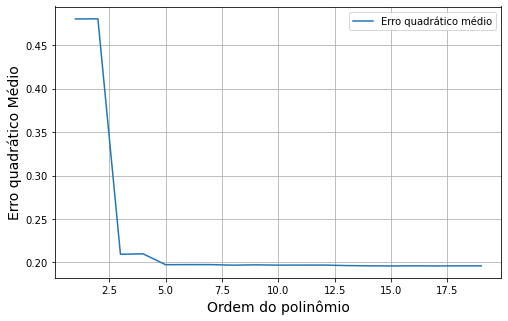

In [26]:
# Plot results.
plt.figure(figsize=(8, 5))
plt.plot(range(1, 20), mean_vec,  label='Erro quadrático médio')
plt.xlabel('Ordem do polinômio', fontsize=14)
plt.ylabel('Erro quadrático Médio', fontsize=14)
plt.legend()
plt.grid()
# Save figure
plt.savefig("holdout.png", dpi=600)
#Show the plot.
plt.show()

# k-fold Cross-Validation ( k = 10)

In [27]:
# Get timestamp of holdout start.
starttime = timeit.default_timer()

# Instantiate the k-Fold object.
kfold = KFold(n_splits=10, shuffle=True, random_state=100)

mean_vec = []
std_vec = []
for d in range(1, 20):
    # Instantiate a polynomial.
    poly_features = PolynomialFeatures(degree=d, include_bias=include_bias)
    # Instantiate a scaler.
    std_scaler = StandardScaler()
    # Instantiate a linear regressor.
    lin_reg = LinearRegression()

    # Create a pipeline of actions.
    polynomial_regression = Pipeline([
        ("poly_features", poly_features),
        ("std_scaler", std_scaler),
        ("lin_reg", lin_reg),
    ])

    lin_scores = cross_val_score(polynomial_regression, x, y, scoring='neg_mean_squared_error', cv=kfold)
        
    scores = np.sqrt(-lin_scores)
    mean_vec.append(scores.mean())
    std_vec.append(scores.std())

print("Tempo de execução: %1.4f [s]" % (timeit.default_timer() - starttime))

Tempo de execução: 2.4666 [s]


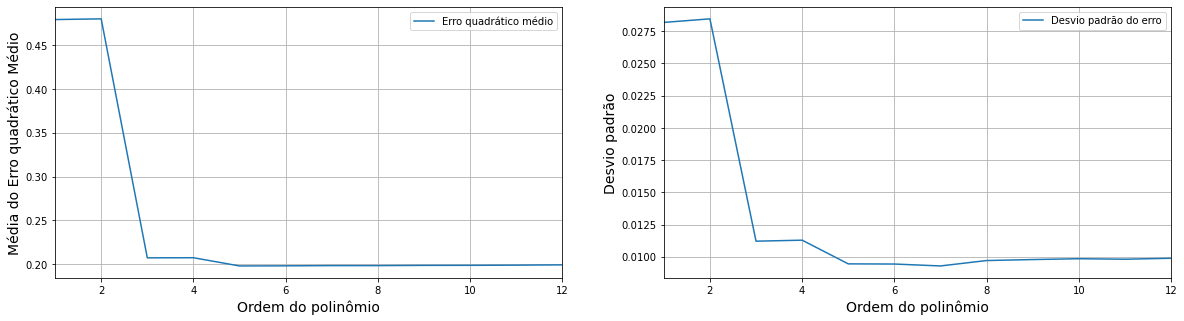

In [29]:
# Plot results.
plt.figure(figsize=(20, 5))
plt.title('AA')
ax = plt.subplot(1, 2, 1)
plt.plot(range(1, 20), mean_vec,  label='Erro quadrático médio')
plt.xlabel('Ordem do polinômio', fontsize=14)
plt.ylabel('Média do Erro quadrático Médio', fontsize=14)
plt.xticks(range(0, 13, 2))
plt.xlim([1, 12])
plt.legend()
plt.grid()

ax = plt.subplot(1, 2, 2)
plt.plot(range(1, 20), std_vec,  label='Desvio padrão do erro')
plt.xlabel('Ordem do polinômio', fontsize=14)
plt.ylabel('Desvio padrão', fontsize=14)
plt.xticks(range(0, 13, 2))
plt.xlim([1, 12])
plt.legend()
plt.grid()

# Save figure
plt.savefig("kfold.png", dpi=600)
#Show the plot.
plt.show()

# Leave-P-Out (P=1).

In [30]:
# Get timestamp of holdout start.
starttime = timeit.default_timer()

# Instantiate the LPOCV object.
lpocv = LeavePOut(p=1)

mean_vec = []
std_vec = []
for d in range(1, 20):
    # Instantiate a polynomial.
    poly_features = PolynomialFeatures(degree=d, include_bias=include_bias)
    # Instantiate a scaler.
    std_scaler = StandardScaler()
    # Instantiate a linear regressor.
    lin_reg = LinearRegression()

    # Create a pipeline of actions.
    polynomial_regression = Pipeline([
        ("poly_features", poly_features),
        ("std_scaler", std_scaler),
        ("lin_reg", lin_reg),
    ])

    lin_scores = cross_val_score(polynomial_regression, x, y, scoring='neg_mean_squared_error', cv=lpocv)
        
    scores = np.sqrt(-lin_scores)
    mean_vec.append(scores.mean())
    std_vec.append(scores.std())
    
print("Tempo de execução: %1.4f [s]" % (timeit.default_timer() - starttime))

Tempo de execução: 214.5208 [s]


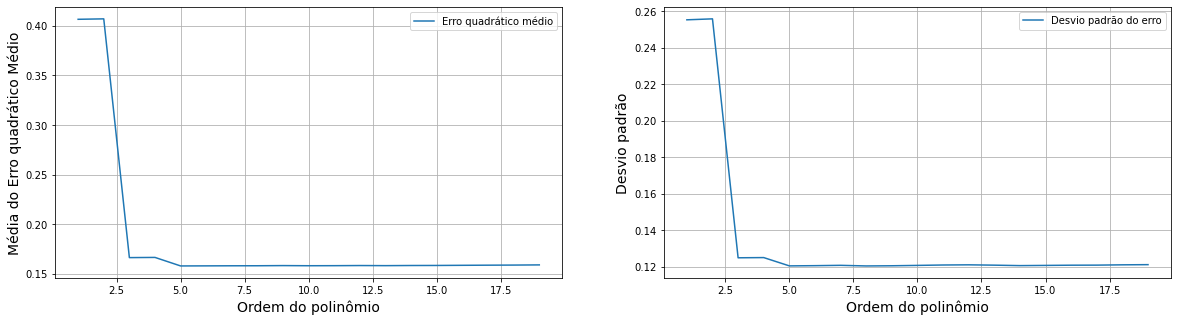

In [31]:
# Plot results.
plt.figure(figsize=(20, 5))
ax = plt.subplot(1, 2, 1)
plt.plot(range(1, 20), mean_vec,  label='Erro quadrático médio')
plt.xlabel('Ordem do polinômio', fontsize=14)
plt.ylabel('Média do Erro quadrático Médio', fontsize=14)
plt.legend()
plt.grid()

ax = plt.subplot(1, 2, 2)
plt.plot(range(1, 20), std_vec,  label='Desvio padrão do erro')
plt.xlabel('Ordem do polinômio', fontsize=14)
plt.ylabel('Desvio padrão', fontsize=14)
plt.legend()
plt.grid()

# Save figure
plt.savefig("leave_one_out.png", dpi=600)
#Show the plot.
plt.show()

Resposta C) 

Foram analisadas as curvas de aprendizado, assim como as curvas de erro quadratico médio e de desvio padrao, para assim podermos descobrir qual é a ordem de polinomio que melhor se aplica. Analisando as curvas podemos entender que o polinomio de grau 5 seria uma ótima escolha, sendo que ele se adapta para os tres métodos analisados.


# Curvas de Aprendizado

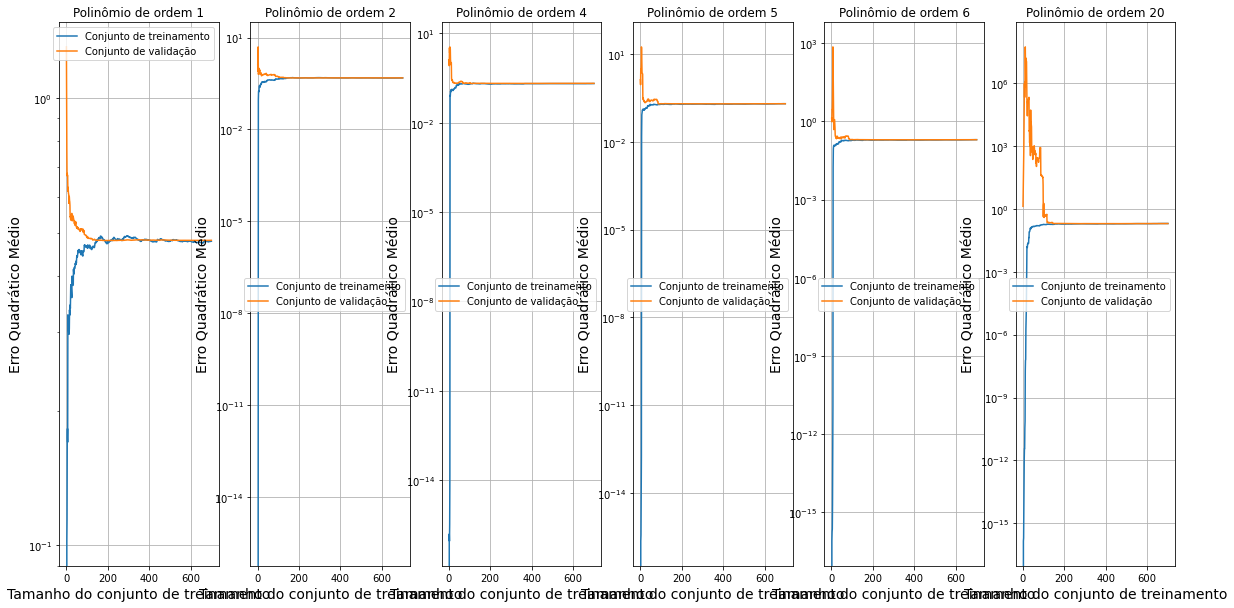

In [42]:
# Polinomial degrees to be tested.

degrees1 = np.array([1,2,4,5,6,20])

degrees = degrees1.astype(int)

plt.figure(figsize=(20, 10))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)

    # Instantiate a polynomial.
    poly_features = PolynomialFeatures(degree=degrees[i], include_bias=include_bias)
    # Instantiate a scaler.
    std_scaler = StandardScaler()
    # Instantiate a linear regressor.
    lin_reg = LinearRegression()

    # Create a pipeline of actions.
    polynomial_regression = Pipeline([
        ("poly_features", poly_features),
        ("std_scaler", std_scaler),
        ("lin_reg", lin_reg),
    ])

    error_training = []
    error_validation = []
    for m in range(1,len(x_train)+1):

        # Perform polynomial regression.
        polynomial_regression.fit(x_train[:m], y_train[:m])

        # Use the trained model for prediction of the training set.
        y_train_predict = polynomial_regression.predict(x_train[:m])

        # Use the trained model for prediction of the validation set.
        y_val_predict = polynomial_regression.predict(x_val)       

        # Calculate MSE for training set.
        error_training.append(mean_squared_error(y_train[:m], y_train_predict))

        # Calculate MSE for validation set.
        error_validation.append(mean_squared_error(y_val, y_val_predict))       

    plt.plot(range(1,len(x_train)+1), np.sqrt(error_training), label='Conjunto de treinamento')
    plt.plot(range(1,len(x_train)+1), np.sqrt(error_validation), label='Conjunto de validação')
    plt.yscale('log')
    plt.xlabel('Tamanho do conjunto de treinamento', fontsize=14)
    plt.ylabel('Erro Quadrático Médio', fontsize=14)
    plt.grid()
    plt.title('Polinômio de ordem '+str(degrees[i]))
    plt.legend(loc='best')
    
# Save figure
plt.savefig("learning_curves.png", dpi=600)
#Show the plot.
plt.show()

# Adaptação do treinamento para o melhor grau de polinômio (5)

In [32]:
# Instantiate a polynomial.
poly_features = PolynomialFeatures(degree=5, include_bias=include_bias)
# Instantiate a scaler.
std_scaler = StandardScaler()
# Instantiate a linear regressor.
lin_reg = LinearRegression()

# Create a pipeline of actions.
polynomial_regression = Pipeline([
    ("poly_features", poly_features),
    ("std_scaler", std_scaler),
    ("lin_reg", lin_reg),
])

polynomial_regression.fit(x, y)
    
y_predict = polynomial_regression.predict(x)

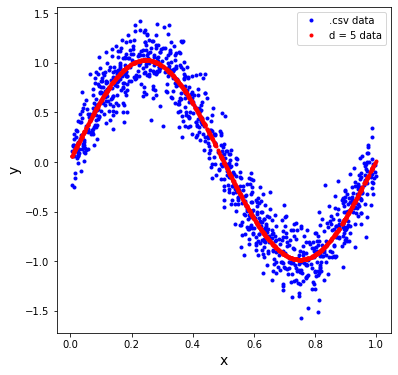

In [44]:
fig = plt.figure(figsize=(6,6))
plt.plot(x, y_noisy, 'b.', label = '.csv data')
plt.plot(x, y_predict, 'r.', label = 'd = 5 data')
plt.xlabel('x',  fontsize=14)
plt.ylabel('y',  fontsize=14)
plt.legend()
plt.show()